In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

### Maths Servers:

In [3]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.data_wrangling as data 

## JRA55
# import dataset for maths servers
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc',
                            parallel=True, chunks={'time': 31})

## ERA5
# ds = xr.open_mfdataset('/home/links/ct715/eddy_feedback/daily_datasets/era5daily_djf_uvt_ep.nc',
#                             parallel=True, chunks={'time': 31})

ds = data.seasonal_mean(ds, season='djf')
ds

<xarray.Dataset>
Dimensions:  (time: 58, level: 37, lat: 73)
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-12-01 1959-12-01 ... 2015-12-01
Data variables:
    ubar     (time, level, lat) float32 4.447e-05 9.285 ... -2.151 4.431e-05
    div1_pr  (time, level, lat) float64 -7.049e+11 5.569 ... 1.144 -9.582e+09
    div1_qg  (time, level, lat) float64 -7.049e+11 5.79 ... 1.159 -9.582e+09

### JASMIN Servers:

In [4]:
# import sys
# sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
# import functions.eddy_feedback as ef 

# # import dataset for JASMIN servers
# ds = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
#                             parallel=True, chunks={'time': 31})

# ds

# Investigate EFP at more levels

In [5]:
# cut dataset down to EFP box
ds = ds.where(ds.level >= 200., drop=True)
ds = ds.where(ds.level <= 600., drop=True)
ds = ds.where(ds.lat >= 25., drop=True)
ds = ds.where(ds.lat <= 75., drop=True)

In [6]:
# define ubar DataArray
u = ds.ubar 
u = u.transpose()

# define div1 DataArray
div1 = ds.div1_pr 
div1 = div1.transpose()

### Take the mean over level domain

In [8]:
# ubar
ubar = ds.ubar 
ubar = ubar.mean('level')
ubar = ubar.transpose()

# div1
div1bar = ds.div1_pr 
div1bar = div1bar.mean('level')
div1bar = div1bar.transpose()

# Facet grids

### ubar

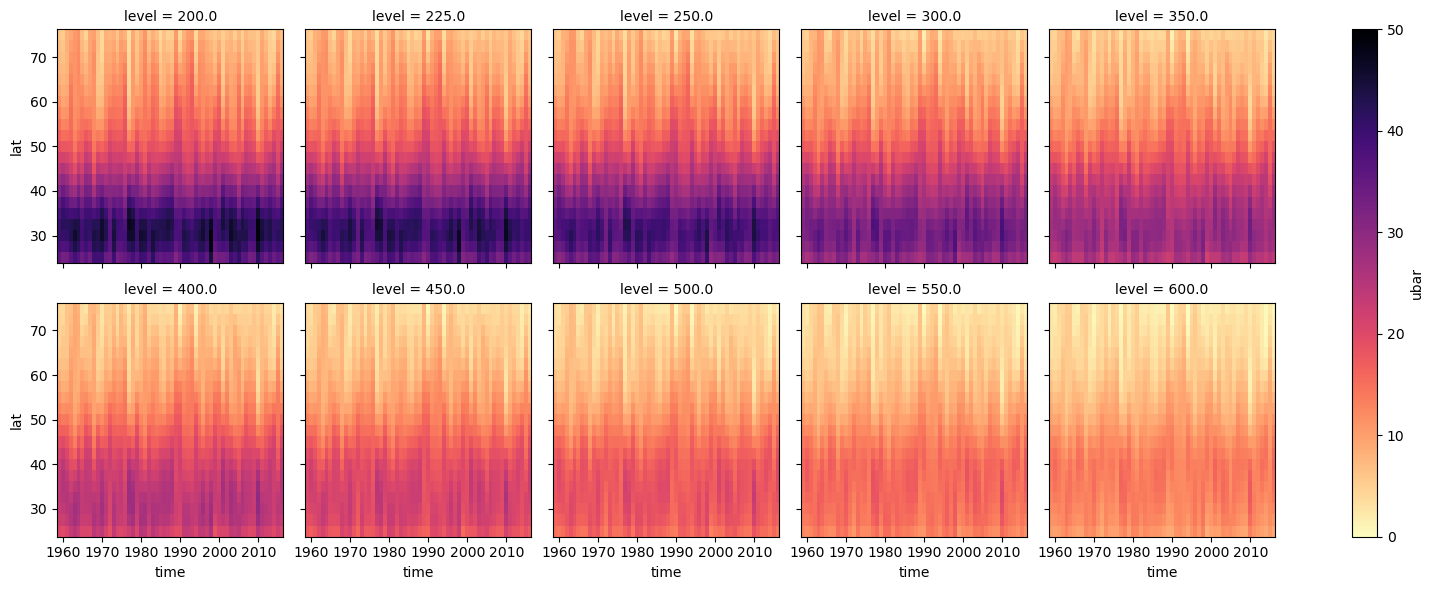

In [10]:
u.plot(x='time', y='lat', col='level', col_wrap=5, vmin=0, vmax=50, cmap='magma_r')

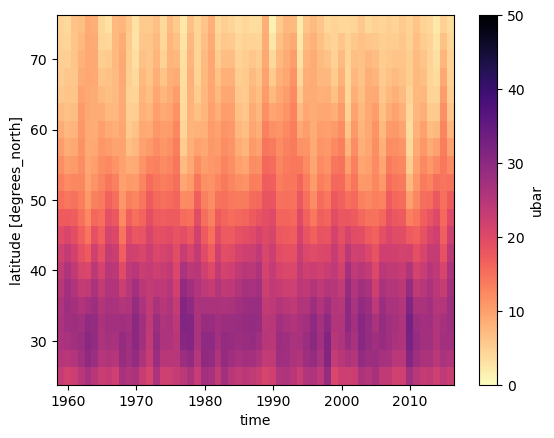

In [11]:
ubar.plot(cmap='magma_r', vmin=0, vmax=50)

### div1

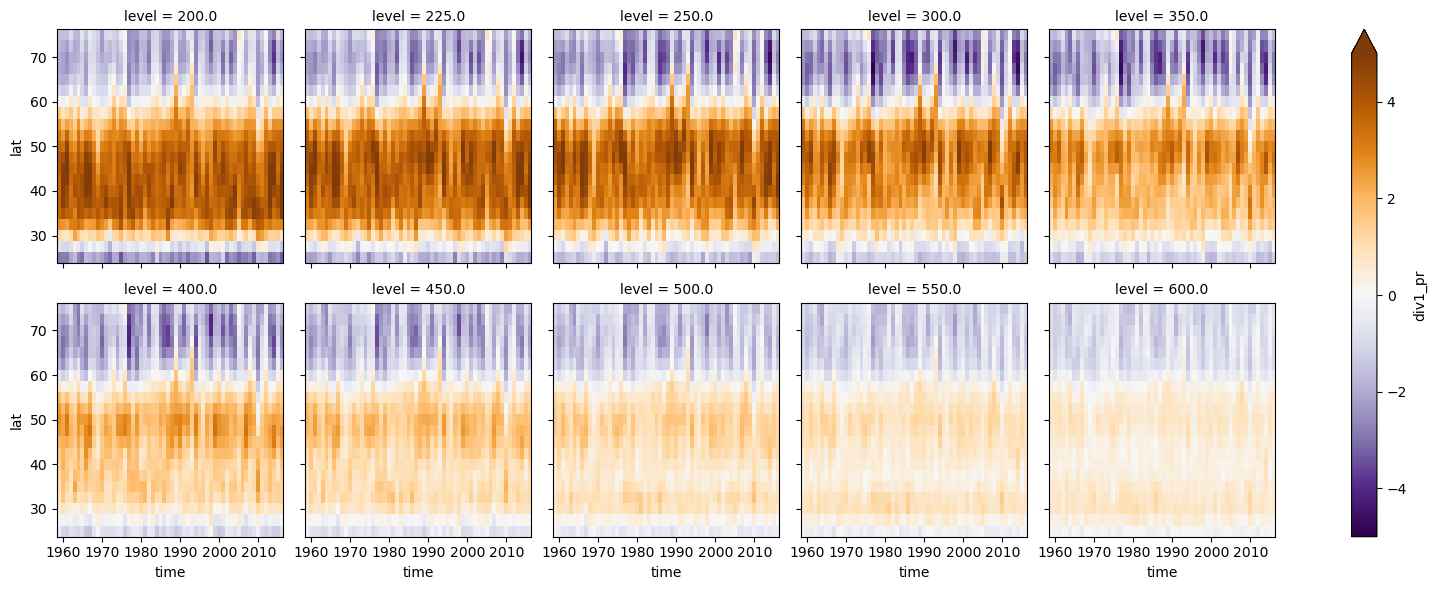

In [12]:
div1.plot(x='time', y='lat', col='level', col_wrap=5, vmin=-5, vmax=5, cmap='PuOr_r')

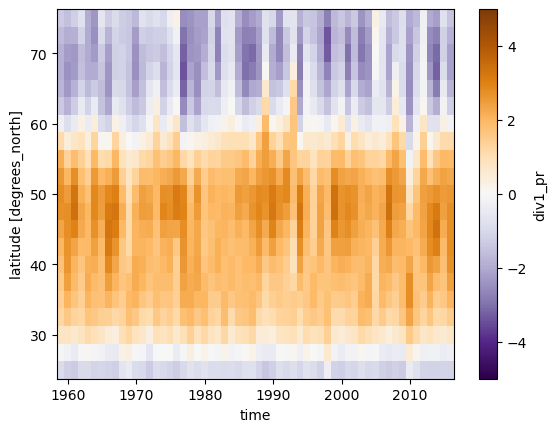

In [13]:
div1bar.plot(vmin=-5, vmax=5, cmap='PuOr_r')

# Put all plots together

In [14]:
#### CANT ADD SUBPLOT TO FACET GRID ####

# fig, (ax1,ax2) = plt.subplots(ncols=2)

# # facet grid
# u.plot(ax=ax1, x='year', y='lat', col='level', col_wrap=5)

# # level mean
# ubar.plot(ax=ax2)

In [15]:
# fig = plt.subplots(2,6, figsize=(17,5), sharex=True, sharey=True,
#                    gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 2]})

# ax1 = plt.subplot2grid( (2,6), (0,0))
# ax2 = plt.subplot2grid( (2,6), (0,1))
# ax3 = plt.subplot2grid( (2,6), (0,2))
# ax4 = plt.subplot2grid( (2,6), (0,3))
# ax5 = plt.subplot2grid( (2,6), (0,4))

# ax6 = plt.subplot2grid( (2,6), (1,0))
# ax7 = plt.subplot2grid( (2,6), (1,1))
# ax8 = plt.subplot2grid( (2,6), (1,2))
# ax9 = plt.subplot2grid( (2,6), (1,3))
# ax10 = plt.subplot2grid( (2,6), (1,4))

# ax11 = plt.subplot2grid( (2,6), (0,5), rowspan=2)

### ubar

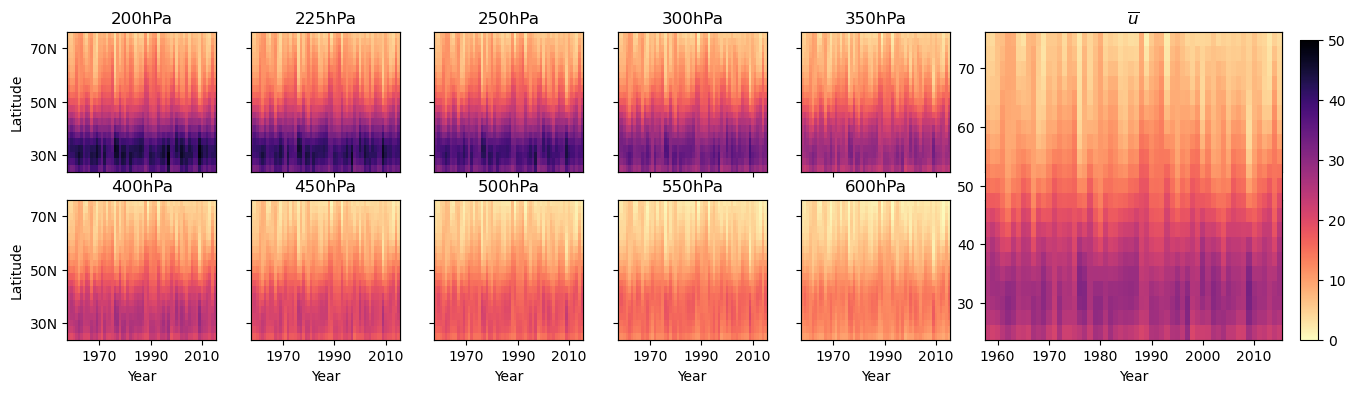

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18,4), sharex=True, sharey=True,
                   gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 2]})

titles = ['200hPa', '225hPa', '250hPa', '300hPa', '350hPa', '400hPa', '450hPa', '500hPa', '550hPa', '600hPa']

for i, ax in enumerate(axes.flat):

    # remove strange ticks from subplot creation
    ax.set_xticks([])
    ax.set_yticks([])

    # top row
    if i < 5:
        ax = plt.subplot2grid( (2,6), (0,i))
        div1ax = ax.pcolormesh(u.time.dt.year.values, u.lat.values, u[:,i,:], cmap='magma_r', vmin=0, vmax=50) 
        ax.set_title(titles[i]) 
        ax.set_xticks([1970, 1990, 2010])
        ax.set_xticklabels([]) 

        if i == 0:
            ax.set_ylabel('Latitude')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels(['30N', '50N', '70N'])
        else:
            ax.set_ylabel('')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels([])

    # bottom row
    elif i < 10:
        ax = plt.subplot2grid( (2,6), (1,i-5))
        div1ax = ax.pcolormesh(u.time.dt.year.values, u.lat.values, u[:,i,:], cmap='magma_r', vmin=0, vmax=50)  
        ax.set_title(titles[i])
        ax.set_xticks([1970, 1990, 2010])
        ax.set_xticklabels(['1970', '1990', '2010'])
        ax.set_xlabel('Year')

        if i == 5:
            ax.set_ylabel('Latitude')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels(['30N', '50N', '70N'])
        else:
            ax.set_ylabel('')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels([])

    # mean over all levels
    elif i == 10:
        ax = plt.subplot2grid( (2,6), (0,5), rowspan=2)
        div1ax = ax.pcolormesh(ubar.time.dt.year.values, ubar.lat.values, ubar, cmap='magma_r', vmin=0, vmax=50)
        ax.set_title('$\\overline{u}$')
        ax.set_xlabel('Year')

# add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.11, 0.01, 0.75]) 
fig.colorbar(div1ax, cax=cbar_ax)

plt.show()

### div1

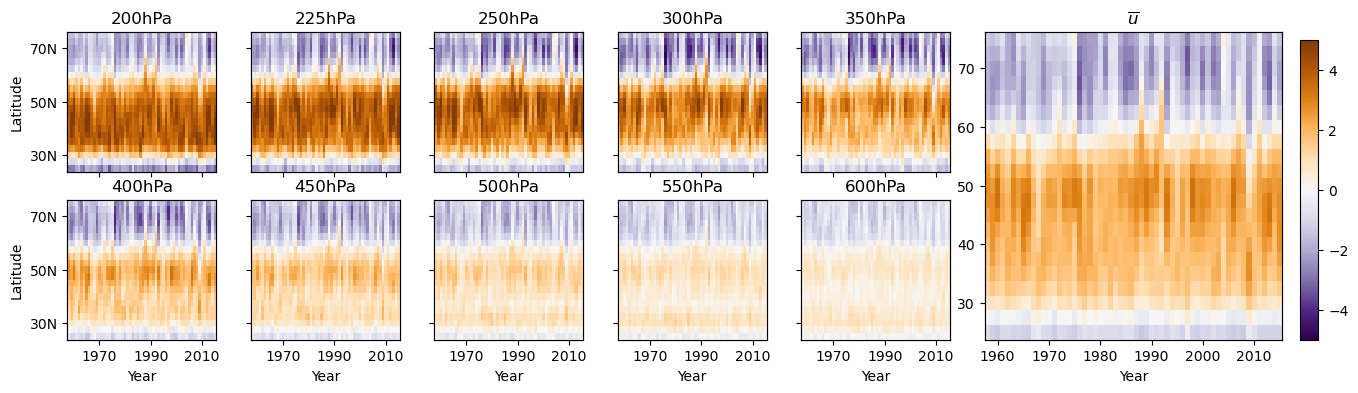

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18,4), sharex=True, sharey=True,
                   gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 2]})

titles = ['200hPa', '225hPa', '250hPa', '300hPa', '350hPa', '400hPa', '450hPa', '500hPa', '550hPa', '600hPa']

for i, ax in enumerate(axes.flat):

    # remove strange ticks from subplot creation
    ax.set_xticks([])
    ax.set_yticks([])

    # top row
    if i < 5:
        ax = plt.subplot2grid( (2,6), (0,i))
        div1ax = ax.pcolormesh(div1.time.dt.year.values, div1.lat.values, div1[:,i,:], cmap='PuOr_r', vmin=-5, vmax=5) 
        ax.set_title(titles[i]) 
        ax.set_xticks([1970, 1990, 2010])
        ax.set_xticklabels([]) 

        if i == 0:
            ax.set_ylabel('Latitude')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels(['30N', '50N', '70N'])
        else:
            ax.set_ylabel('')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels([])

    # bottom row
    elif i < 10:
        ax = plt.subplot2grid( (2,6), (1,i-5))
        div1ax = ax.pcolormesh(div1.time.dt.year.values, div1.lat.values, div1[:,i,:], cmap='PuOr_r', vmin=-5, vmax=5)  
        ax.set_title(titles[i])
        ax.set_xticks([1970, 1990, 2010])
        ax.set_xticklabels(['1970', '1990', '2010'])
        ax.set_xlabel('Year')

        if i == 5:
            ax.set_ylabel('Latitude')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels(['30N', '50N', '70N'])
        else:
            ax.set_ylabel('')
            ax.set_yticks([30, 50, 70])
            ax.set_yticklabels([])

    # mean over all levels
    elif i == 10:
        ax = plt.subplot2grid( (2,6), (0,5), rowspan=2)
        div1ax = ax.pcolormesh(div1bar.time.dt.year.values, div1bar.lat.values, div1bar, cmap='PuOr_r', vmin=-5, vmax=5)
        ax.set_title('$\\overline{u}$')
        ax.set_xlabel('Year')

# add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.11, 0.01, 0.75]) 
fig.colorbar(div1ax, cax=cbar_ax) 

plt.show()